# Solving linear sets of equations using Grover's Algorithm

In this notebook we try to solve a 4x4 matrix using grovers algorithm.

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info.operators import Operator

# import basic plot tools
from qiskit.visualization import plot_histogram 

The problem we are trying to solve is as follows:
$A\vec{x}=\vec{b}$

**Cite grover's algorithm  paper**
**Cite Qiskit implementation tutorial**
**Cite the book om Quantum computation**

For example we want to solve a 4x4 matrix, for the following parameters.

$A=\begin{bmatrix}
1 & 0 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 1 & 0 & 1\\
1 & 0 & 1 & 0
\end{bmatrix}, \vec{b}=\begin{bmatrix} 1\\1\\1\\1 \end{bmatrix}$

We then define the oracle to be $U_w|x\rangle=\left\{\begin{aligned}|x\rangle & \text { if } x \neq w \\ -|x\rangle & \text { if } x=w\end{aligned}\right.$

If $A$ would is an $m*l$ matrix and $\vec{b}$ a $l*1$ and $\vec{x}$ an $m*l$ size. 

To create the oracle like this we can use the following function $g(\vec{x})=A\vec{x}-\vec{b}+\vec{1}_l$. We know that this function returns $\vec{1}_l$ if it has the right solution. And a different vector if it is not the right solution. If we then define a constant $c_i$ to be zero when 

If we then define a function $f())\vec{x}$ that check if it is the right solution and returns 1 if $\vec{x}$ is the right solution and returns 0 if it is not. Then we can redefine our oracle to be:

$U_w |x\rangle=(-1)^{f(x)}|x\rangle$ 

After the oracle function we want to implement the diffusion operator, as we know from theory this operator should flip every state orthogonal to the solution vector. This means that we can first perform a hadamard gate which transforms the solution state into the zero vector. And then apply a negative phase to all the states orthogonal to the zero vector. 

After that we can perform the diffusion operator about $\pi/4\sqrt{N}$ times. For our scenario $N=15$ so that we repeat the diffusion operator 3 times. 


In [2]:
# here we create the oracle function for the problem that we want to solve our oracle function:
# this can be created according to the defintion above. 

oracle_matrix = np.array([
    [1,0,0,0  ,0,0,0,0  ,0,0,0,0  ,0,0,0,0],
    [0,1,0,0  ,0,0,0,0  ,0,0,0,0  ,0,0,0,0],
    [0,0,1,0  ,0,0,0,0  ,0,0,0,0  ,0,0,0,0],
    [0,0,0,1  ,0,0,0,0  ,0,0,0,0  ,0,0,0,0],
    
    [0,0,0,0  ,1,0,0,0  ,0,0,0,0  ,0,0,0,0],
    [0,0,0,0  ,0,1,0,0  ,0,0,0,0  ,0,0,0,0],
    [0,0,0,0  ,0,0,1,0  ,0,0,0,0  ,0,0,0,0],
    [0,0,0,0  ,0,0,0,1  ,0,0,0,0  ,0,0,0,0],
    
    [0,0,0,0  ,0,0,0,0  ,-1,0,0,0  ,0,0,0,0],
    [0,0,0,0  ,0,0,0,0  ,0,1,0,0  ,0,0,0,0],
    [0,0,0,0  ,0,0,0,0  ,0,0,1,0  ,0,0,0,0],
    [0,0,0,0  ,0,0,0,0  ,0,0,0,1  ,0,0,0,0],
    
    [0,0,0,0  ,0,0,0,0  ,0,0,0,0  ,1,0,0,0],
    [0,0,0,0  ,0,0,0,0  ,0,0,0,0  ,0,1,0,0],
    [0,0,0,0  ,0,0,0,0  ,0,0,0,0  ,0,0,1,0],
    [0,0,0,0  ,0,0,0,0  ,0,0,0,0  ,0,0,0,1],
    ])

Oracle = Operator(oracle_matrix)

In [3]:
# here we define the diffusion operator(this is a general ):
diff_op = np.zeros([16,16])
for i in range(16):
    diff_op[i,i] = -1
diff_op[0,0] = 1

diffusion_operator = Operator(diff_op)

In [4]:
# the functions needed to perform grovers algorithm
# Initialisation function 
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [9]:
# Now we create the circuit and perform it:

In [7]:
# number of repetitions that is optimal:
num_rep = 3

# the circuit of the matrix:
qc = QuantumCircuit(4)
qc.h([0,1,2,3])
qc.append(Oracle,[0,1,2,3])
qc.h([0,1,2,3])
for i in range(num_rep):
    qc.append(diffusion_operator,[0,1,2,3])
    
qc.h([0,1,2,3])
qc.measure_all()
qc.draw()

┌───┐┌──────────┐┌───┐┌──────────┐┌──────────┐┌──────────┐┌───┐ ░ ┌─┐»
   q_0: ┤ H ├┤0         ├┤ H ├┤0         ├┤0         ├┤0         ├┤ H ├─░─┤M├»
        ├───┤│          │├───┤│          ││          ││          │├───┤ ░ └╥┘»
   q_1: ┤ H ├┤1         ├┤ H ├┤1         ├┤1         ├┤1         ├┤ H ├─░──╫─»
        ├───┤│  Unitary │├───┤│  Unitary ││  Unitary ││  Unitary │├───┤ ░  ║ »
   q_2: ┤ H ├┤2         ├┤ H ├┤2         ├┤2         ├┤2         ├┤ H ├─░──╫─»
        ├───┤│          │├───┤│          ││          ││          │├───┤ ░  ║ »
   q_3: ┤ H ├┤3         ├┤ H ├┤3         ├┤3         ├┤3         ├┤ H ├─░──╫─»
        └───┘└──────────┘└───┘└──────────┘└──────────┘└──────────┘└───┘ ░  ║ »
meas: 4/═══════════════════════════════════════════════════════════════════╩═»
                                                                           0 »
«                 
«   q_0: ─────────
«        ┌─┐      
«   q_1: ┤M├──────
«        └╥┘┌─┐   
«   q_2: ─╫─┤M├───
«         ║ └╥┘┌─┐
«   q_3: ─╫──╫─┤M├
«         ║  ║ └╥┘
«meas: 4/═╩══╩══╩═
«         1  2  3

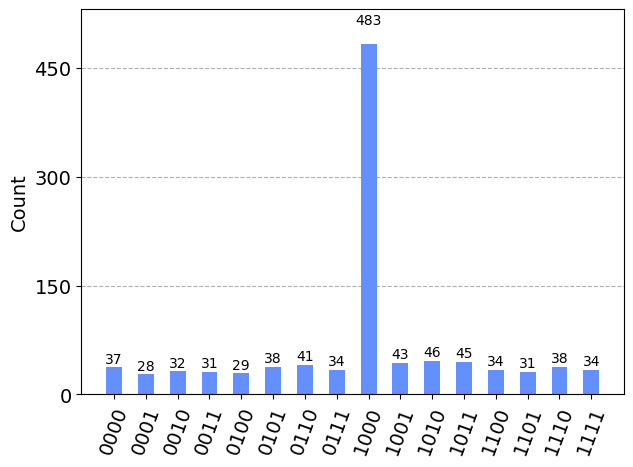

In [8]:
# here we perform the circuit:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(qc, aer_sim)
qobj = assemble(transpiled_circuit)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e107b99-ec0e-43d9-aa18-8c6ee91759cf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>